# Hierarchical Clustering

## Basics

Hierarchical clustering algorithms group similar objects into groups called clusters. There are two types of hierarchical clustering algorithms:

- Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.
- Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

![Types](images/1.png)


## How it works

1. Make each data point a cluster
![i2](images/2.png)
2. Take the two closest clusters and make them one cluster
![i3](images/3.png)
3. Repeat step 2 until there is only one cluster
![i4](images/4.png)


## Dendograms
We can use a dendrogram to visualize the history of groupings and figure out the optimal number of clusters.
1. Determine the largest vertical distance that doesn’t intersect any of the other clusters
2. Draw a horizontal line at both extremities
3. The optimal number of clusters is equal to the number of vertical lines going through the horizontal line
For eg., in the below case, best choice for no. of clusters will be 4.
![i5](images/5.png)



## Linkage Criteria
The linkage criteria refers to how the distance between clusters is calculated.

![i6](images/6.png)

### Single Linkage
![i5](images/7.png)

### Complete Linkage
![i5](images/8.png)

### Average Linkage
![i5](images/9.png)

## Distance Metric
The method you use to calculate the distance between data points will affect the end result.

### Euclidean Distance
The shortest distance between two points. For example, if x=(a,b) and y=(c,d), the Euclidean distance between x and y is √(a−c)²+(b−d)²
![i5](images/10.png)

### Manhattan Distance
Imagine you were in the downtown center of a big city and you wanted to get from point A to point B. You wouldn’t be able to cut across buildings, rather you’d have to make your way by walking along the various streets. For example, if x=(a,b) and y=(c,d), the Manhattan distance between x and y is |a−c|+|b−d|

![i5](images/11.png)

# Let's Code!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the dendrogram to find the optimal number of clusters

In [17]:
X_new = X[:20]

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]
 [19 14]
 [19 99]
 [20 15]
 [20 77]
 [20 13]
 [20 79]
 [21 35]
 [21 66]
 [23 29]
 [23 98]]


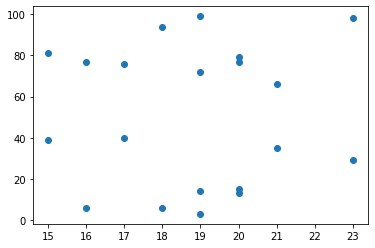

In [23]:

import matplotlib.pyplot as plt
x = dataset['Annual Income (k$)'][:20]
y = dataset['Spending Score (1-100)'][:20]


# Scatter plot
print(X_new)
plt.scatter(x, y)


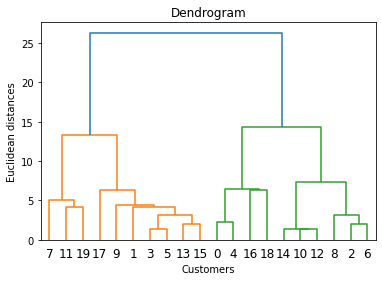

In [28]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_new, method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(X_new)


In [30]:
y_hc
X=X_new

## Visualising the clusters

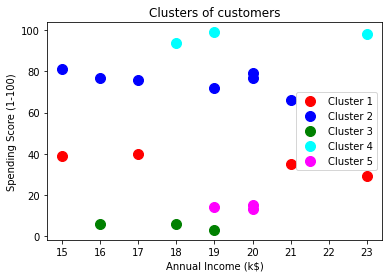

In [31]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()